# FinTech App- Exploratory Data Analysis (First look at the dataset)

Downloaded this dataset from Kaggle, as no data from CRED app was readily available. 
In this notebook, I have simply tried to look at the data, run a few machine learning models and tried to explore the data to understand it further. I have also documented my process and findings, while also adding a few interesting visualisations towards the end of the notebook.

## Viewing the data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pivottablejs import pivot_ui

In [10]:
#Loading and viewing the data
data0 = pd.read_csv(r"C:\Users\Lenovo C340\appdata10.csv")

In [11]:
data1 = pd.DataFrame(data0)
data1

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [12]:
data2 = data1.drop(["age","user","first_open","dayofweek","screen_list","minigame","liked","enrolled_date","enrolled"], axis=1)


In [13]:
x = data2.drop(["hour","used_premium_feature"],axis=1)
y = data2["used_premium_feature"]

from sklearn import preprocessing

x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

## Trying Machine Learning to see if Number of Screens can accurately help in predicting whether the user has/will enroll(ed) or not

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


In [15]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_predict = cls.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test,y_predict)
cnf

array([[10350,     2],
       [ 2148,     0]], dtype=int64)

In [18]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_predict)
acc

0.828

Here, although accuracy of the classifier is 83%, from the confusion matrix, it is visible how the model is predicting y=True for almost every sample. This could be because--> training dataset is skewed towards y=True (maybe)

Now, upon reshaping the data , lets run the model on it again.

In [19]:
from sklearn.utils import resample
Y1 = data2.used_premium_feature
X1 = data2.drop(["hour","used_premium_feature"],axis=1)

X1= X1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X1)

X1 = pd.DataFrame(x_scaled)

In [20]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30)

X1 = pd.concat([X1_train, Y1_train], axis=1)



In [21]:

not_prem = X1[X1.used_premium_feature==0]
prem = X1[X1.used_premium_feature==1]

In [22]:
prem_undersampled = resample(prem,
                          replace=True,
                          n_samples=len(not_prem), 
                          random_state=27)


In [23]:
undersampled = pd.concat([not_prem, prem_undersampled])

undersampled.used_premium_feature.value_counts()

1    28990
0    28990
Name: used_premium_feature, dtype: int64

Now, trying to run the model with more homogeneous dataset

In [24]:
Y1_train = undersampled.used_premium_feature
X1_train = undersampled.drop("used_premium_feature", axis=1)

In [25]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X1_train,Y1_train)
Y1_pred = cls.predict(x_test)
Y1_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test,Y1_pred)
cnf

array([[6455, 3897],
       [1197,  951]], dtype=int64)

In [27]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,Y1_pred)
acc

0.59248

Despite trying to tune multiple parameters and classification models (SVM, RandomForest, Logistic Reg), unable to predict the behaviour of user based on number of screens used, quite accurately. The most accurate model applied so far has been only 61% accurate.

## Further Studying the Data to find scope for further analysis and understanding the underlying trends found so far

In [28]:
import seaborn as sns

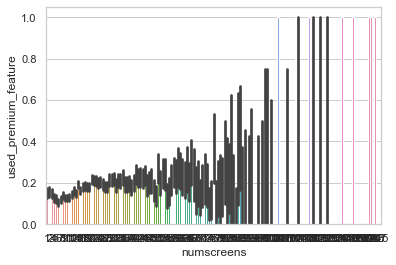

In [29]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="numscreens", y="used_premium_feature", data=data2)

Looking at the shape of the curve, we can now tell why logistic regression was a better model than Random Forest/SVM!

In [30]:
data_numeric = data0.drop(columns = ['user', 'first_open', 'screen_list', 
                                    'enrolled_date'], inplace = False)

<AxesSubplot:title={'center':'Variables Correlation to Enrolled'}>

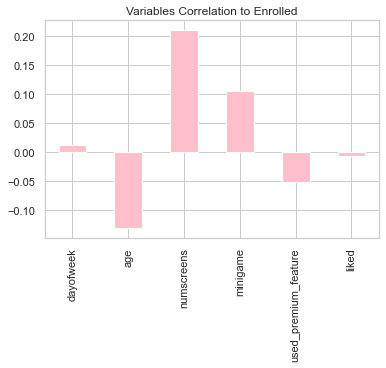

In [31]:
correlation = data_numeric.drop(columns = ['enrolled'], inplace = False).corrwith(
    data_numeric.enrolled)
correlation.plot.bar(title = 'Variables Correlation to Enrolled', color="pink")

Upon further exploration with the dataset, it is visible that the User's decidion to enroll/not enroll has only correlation factor of 0.2 with the number of screens. Although 0.2 is higher than the other factors, it is not enough to make a conclusion regarding dependency. A good correlation should be at least 0.4 or higher in order to further explore the data. 

Also, an interesting factor to keep in mind is that there is a slight negative correlation (~neg0.17) between age and enrollment. It could be worth exploring, to see how age factor plays in FinTech App enrollment. 

In [32]:
data_numeric

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,02:00:00,23,15,0,0,0,0
1,6,01:00:00,24,13,0,0,0,0
2,1,19:00:00,23,3,0,1,0,1
3,4,16:00:00,28,40,0,0,1,0
4,1,18:00:00,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13:00:00,32,13,0,0,1,0
49996,1,00:00:00,35,4,0,1,0,0
49997,2,22:00:00,39,25,0,0,0,0
49998,6,12:00:00,27,26,0,0,1,0


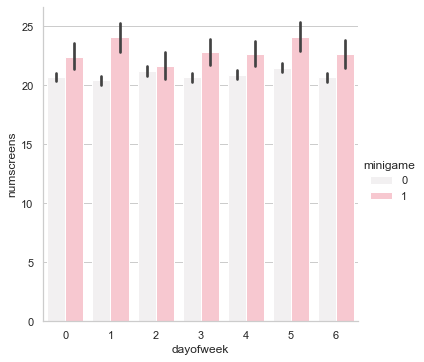

In [33]:
sns.catplot(x='dayofweek', y='numscreens', hue='minigame', data=data_numeric, kind='bar', color="pink")

On average, trend is mostly the same throughout app data, however, worth noticing that number of screens as well as tendency to play minigames is slightly higher on 1= Monday and 5= Friday

In [44]:
Q1 = data_numeric.quantile(0.05)
Q2 = data_numeric.quantile(0.95)

IQR = Q2 - Q1

df_no_outliers = data_numeric.clip(lower=Q1,upper=Q2, axis=1)
df_no_outliers.iloc[99:109,:]

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
99,6,NaN,30,7,0,0,1,0
100,2,NaN,19,20,0,0,1,0
101,1,NaN,30,18,0,0,1,1
102,2,NaN,34,16,0,1,1,0
103,4,NaN,37,4,0,0,0,0
104,1,NaN,27,34,0,0,0,0
105,5,NaN,19,16,0,0,1,0
106,4,NaN,25,40,0,0,1,0
107,6,NaN,20,3,1,0,0,0
108,3,NaN,34,15,0,0,1,0
